<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Crashing on first time step on the western boundary at 2 392 25 in fortran.

Going to try smoothing the restart file.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline

In [2]:
restart_file = xr.open_dataset('/Users/sallen/Documents/MEOPAR/Crashes_Data/SalishSea_03162240_restart.nc')
restart_file

<xarray.Dataset>
Dimensions:       (t: 1, x: 398, y: 898, z: 40)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    kt            float64 ...
    ndastp        float64 ...
    adatrj        float64 ...
    ssh_ibb       (t, y, x) float64 ...
    rnf_b         (t, y, x) float64 ...
    rnf_hc_b      (t, y, x) float64 ...
    rnf_sc_b      (t, y, x) float64 ...
    utau_b        (t, y, x) float64 ...
    vtau_b        (t, y, x) float64 ...
    qns_b         (t, y, x) float64 ...
    emp_b         (t, y, x) float64 ...
    sfx_b         (t, y, x) float64 ...
    en            (t, z, y, x) float64 ...
    avt           (t, z, y, x) float64 ...
    avm           (t, z, y, x) float64 ...
    avmu          (t, z, y, x) float64 ...
    avmv          (t, z, y, x) float64 ...
    mxln          (t, z, y, x) float64 ...
    ub2_b         (t, y, x) float64 ...
    vb2_b         (t, y, x) float64 ...
    sbc_hc_b      (t, y, x) float64 ...
    sbc_sc_b      (t, y, x) float64 ...
    qsr_hc_b      (t, z, y, x) float64 ...
    fraqsr_1lev   (t, y, x) float64 ...
    fse3t_b       (t, z, y, x) float64 ...
    fse3t_n       (t, z, y, x) float64 ...
    rdt           float64 ...
    rdttra1       float64 ...
    ub            (t, z, y, x) float64 ...
    vb            (t, z, y, x) float64 ...
    tb            (t, z, y, x) float64 ...
    sb            (t, z, y, x) float64 ...
    rotb          (t, z, y, x) float64 ...
    hdivb         (t, z, y, x) float64 ...
    sshb          (t, y, x) float64 ...
    un            (t, z, y, x) float64 ...
    vn            (t, z, y, x) float64 ...
    tn            (t, z, y, x) float64 ...
    sn            (t, z, y, x) float64 ...
    rotn          (t, z, y, x) float64 ...
    hdivn         (t, z, y, x) float64 ...
    sshn          (t, y, x) float64 ...
    rhop          (t, z, y, x) float64 ...
Attributes:
    file_name:  SalishSea_03162240_restart.nc
    TimeStamp:  16/06/2020 01:52:05 -0700

Look at velocity

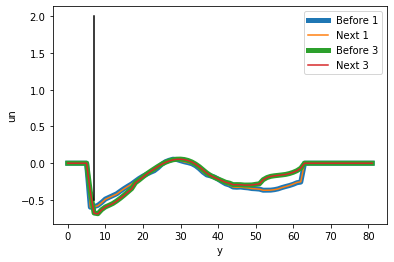

In [6]:
ib, ie = 385, 467
uveln19 = restart_file.un[0, 25-1]
uvelb19 = restart_file.ub[0, 25-1]
uvelb19[ib:ie, 1].plot(label="Before 1", linewidth=5)
uveln19[ib:ie, 1].plot(label="Next 1")
uvelb19[ib:ie, 3].plot(label="Before 3", linewidth=5)
uveln19[ib:ie, 3].plot(label="Next 3")
plt.plot([392-ib, 392-ib], [-0.5, 2], color='k');
plt.legend();

In [7]:
restart_file.un[0, :, :, 1] = restart_file.un[0, :, :, 2]
restart_file.ub[0, :, :, 1] = restart_file.ub[0, :, :, 2]
restart_file.vn[0, :, :, 1] = restart_file.vn[0, :, :, 2]
restart_file.vb[0, :, :, 1] = restart_file.vb[0, :, :, 2]

In [8]:
restart_file.attrs['Modified'] = 'copied velocity one away from west boundary to boundary'
restart_file.attrs

{'file_name': 'SalishSea_03162240_restart.nc',
 'TimeStamp': '16/06/2020 01:52:05 -0700',
 'Modified': 'copied velocity one away from west boundary to boundary'}

In [9]:
restart_file.to_netcdf('SalishSea_03162240_restart.nc')